# Analise sobre os jogos populares da steam(2019-2024)
---

## Integrantes:
- Samuel Santos;
- Pedro Henrique;
- Leonardo Filho;
- Sean Lucas.

---

## Introdução:

A indústria de jogos digitais representa um dos setores de entretenimento de maior e mais rápido crescimento globalmente, movimentando bilhões de dólares e atraindo uma audiência massiva. Em um ambiente tão dinâmico e competitivo, a capacidade de identificar os elementos que propulsionam a popularidade de um jogo é um diferencial estratégico. Este projeto busca mergulhar nas complexidades desse mercado, examinando duas variáveis fundamentais: o preço de venda e a categorização por gênero.

### Motivação:
Este estudo é uma aplicação prática dos conhecimentos adquiridos na disciplina de Introdução à Ciência de Dados, utilizando-se de técnicas de pré-processamento, análise exploratória e visualização de dados com Python (Pandas, Matplotlib, Seaborn). A motivação transcende o escopo acadêmico, aspirando a desvendar insights valiosos para a indústria de jogos. Compreender como o preço afeta o engajamento do público e quais gêneros estão em ascensão ou declínio ao longo do tempo pode informar decisões cruciais para desenvolvedores, editores e investidores, desde a estratégia de precificação até o planejamento de novos projetos. A escolha do período de 2019 a 2024 é estratégica, pois captura um momento de significativas transformações no comportamento do consumidor e no cenário global.

### Objetivos da Análise:
O objetivo geral deste trabalho é investigar os fatores que influenciam a popularidade de jogos digitais no período de 2019 a 2024. Para atingir este fim, foram estabelecidos os seguintes objetivos específicos:

1. Analisar a Influência do Preço: Determinar se e como o preço de um jogo (em USD) impacta sua popularidade, avaliando a correlação linear e os padrões de popularidade em diferentes faixas de preço. Este objetivo visa identificar se jogos gratuitos ou de alto custo desempenham papéis distintos na popularidade média e nos picos de jogadores.

2. Identificar Gêneros Dominantes: Identificar os gêneros de jogos que apresentaram maior popularidade média no período total analisado (2019-2024), compreendendo a distribuição geral da popularidade entre as diferentes categorias de jogos.

3. Quais jogos se mantiveram no topo ao longo de todos os anos, e o que eles têm em comum?



---

## Dados Usados:

---
## Importações para Pré-processamento e Analises:

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import linregress

---

## Pré-processamento:

### Formatando Datas de Lançamentos dos Jogos
Como as datas de lançamentos de cada jogo veio no formato "mes-escrito dia, ano", seria inviável utilizarmos esses dados para análise. Portanto, convertemos as datas para o formato DateTime para um uso mais viável.

In [15]:
# Formatando data de lançamento dos jogos
df_games_info = pd.read_csv("data/all_games_info.csv")

df_games_info["release_date"] = pd.to_datetime(df_games_info["release_date"])
df_games_info.to_csv("data/all_games_info.csv", index=False)

### Capturando VRAMs
No dataset "all_games_info.csv", há uma coluna chamada "pc_requirements" em que, nela, possui as especificações de GPUs e/ou GPUs necessárias para um bom funcionamento do software. Entretanto, como a coluna não é padronizada, a coleta da VRAM dessas GPUs ajudaria nas análises a serem feitas. 


In [16]:
# padronizando GPUS pelos modelos e VRAM
pattern = r'(?i)\b(?:GB\s*(?P<vram1>\d+)|(?P<vram2>\d+)\s*GB)|\b(?P<sigla>GTX|GT|RTX|RT|NVidia|GeForce|Intel HD|GTS|INTEL HD Graphics|Intel HD Graphics|GTX)\s*(?P<gnum>\d{2,4})\b'

ex = df_games_info["pc_requirements"].str.extract(pattern)

vram = ex["vram1"].fillna(ex["vram2"])

gpu = (ex["sigla"].str.upper().fillna("") + " " + ex["gnum"].fillna("")).str.strip()
gpu = gpu.replace("", np.nan)

df_games_info["gpu_vram"] = vram.where(vram.notna(), gpu)
df_games_info.loc[vram.notna(), "gpu_vram"] = df_games_info.loc[vram.notna(), "gpu_vram"]


vram_gpus = {
    1: [
        "GTX 550", "GTX 560", "GTX 650", "GT 420", "GTX 470", "GTX 580", "GTX 430", "GTX 260", "GTX 600", "GEFORCE 8800", "GEFORCE 6600", "INTEL HD GRAPHICS 4000", "INTEL HD 3000", "INTEL HD GRAPHICS 520", "NVIDIA 6600", "INTEL HD GRAPHICS 4600"
        "GTX 700", "GT 740", "GTX 460", "GT 430", "GeForce 8800 GT", "GeForce 6600","NVidia 6600", "GeForce 8600", "Intel HD 530", "INTEL HD 4600", "GEFORCE 8600", "INTEL HD 530", "GEFORCE 7300", "NVIDIA 7900", "NVIDIA 9800", "NVIDIA 8600",
        "GEFORCE 6800", "INTEL HD 520"
    ],
    2: [
        "GTX 660", "GTX 680", "GTX 760", "GTX 770", "GT 710", "GT 1030", "GT 450", "GT 730", "GTX 960", "GTX 670", "GTX 1050", "GTX 900", "GTX 750", "Intel HD 4600", "NVidia 650", "GTX 750", "GeForce 760", "GEFORCE 760",
        "GEFORCE 750", "GTS 450",  
    ],
    3: [
        "GTX 780"
    ],
    4: [
        "GTX 1650", "GTX 970", "GTX 980", "GTX 950", "GTX 1070", "GTX 1080", "GTX 1650"
    ],
    6: [
        "GTX 1060"
    ],
    8: [
        "GeForce 1070 Ti", "GEFORCE 1070", "GEFORCE 1080"
    ]
}

for vram, gpus in vram_gpus.items():
    for gpu in gpus:
        if gpu in df_games_info["gpu_vram"].values:
            df_games_info.loc[df_games_info["gpu_vram"] == gpu, "gpu_vram"] = int(vram)
            
df_games_info["gpu_vram"] = df_games_info["gpu_vram"].fillna(1)

df_games_info['gpu_vram'] = pd.to_numeric(df_games_info['gpu_vram'], errors='coerce')
            

            
df_games_info.to_csv("data/all_games_info.csv", index=False)



---
## Perguntas

### 1. Quais jogos se mantiveram no topo ao longo de todos os anos, e o que eles têm em comum?

In [17]:
df_games_fixos = pd.read_csv("data/all_games_info.csv")
df_games_fixos = pd.merge(df_games_fixos, pd.read_csv("data/all_games_review.csv"), on="id", how="outer")
df_games_fixos = pd.merge(df_games_fixos, pd.read_csv("data/all_games_time.csv"), on="id", how="outer")

for i in range(6):
    year = 2019 + i
    
    df_year = pd.read_csv(f"data/most_played_{year}.csv")
    df_games_fixos = pd.merge(df_games_fixos, df_year, on='id', suffixes=(f"_{year-1}", f"_{year}"))
    
df_games_fixos["mean_average"] = df_games_fixos[['average_2019','average_2020','average_2021','average_2022','average_2023','average_2024']].mean(axis=1)
    
    
print("Jogos que se mantiveram no topo entre 2019 e 2024:")
print(df_games_fixos["game"])

Jogos que se mantiveram no topo entre 2019 e 2024:
0                       Team Fortress 2
1                         Left 4 Dead 2
2                                Dota 2
3                      Counter-Strike 2
4              FINAL FANTASY XIV Online
5                              Terraria
6                              PAYDAY 2
7                                  DayZ
8                Euro Truck Simulator 2
9                              Warframe
10                          War Thunder
11                        7 Days to Die
12                                 Rust
13            Grand Theft Auto V Legacy
14         Sid Meier’s Civilization® VI
15                             Unturned
16                Don't Starve Together
17    Tom Clancy's Rainbow Six® Siege X
18                     Dead by Daylight
19                    Hearts of Iron IV
20                       Stardew Valley
21                  PUBG: BATTLEGROUNDS
22                            Destiny 2
Name: game, dtype: object


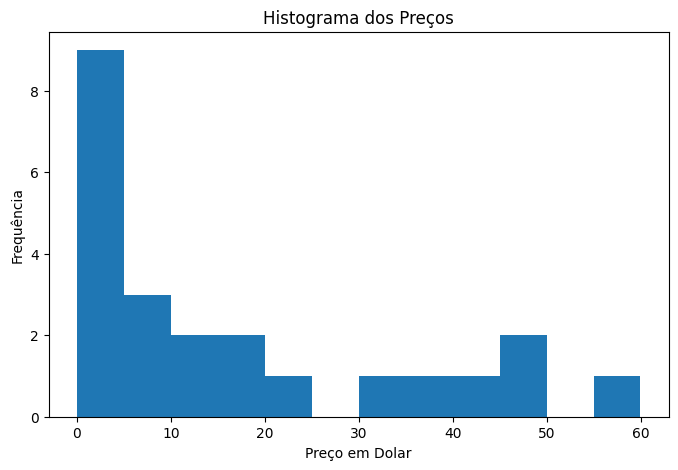

Média: 17.39
Mediana: 9.99
Desvio padrão: 19.47


In [18]:
plt.figure(figsize=(8, 5))
plt.hist(df_games_fixos["price_USD"], bins=12)

plt.title("Histograma dos Preços")
plt.xlabel("Preço em Dolar")
plt.ylabel("Frequência")
plt.show()

print(f"Média: {df_games_fixos["price_USD"].mean():.2f}")
print(f"Mediana: {df_games_fixos["price_USD"].median():.2f}")
print(f"Desvio padrão: {df_games_fixos["price_USD"].std():.2f}")

#### Análise do Histograma dos Preços:
O histograma sugere que os jogos gratuitos são os que mais se mantém no topo.
Também, como a mediana é 9.99, isto significa que 50% dos dados possuem um preço extremamente acessível aos jogadores.

---

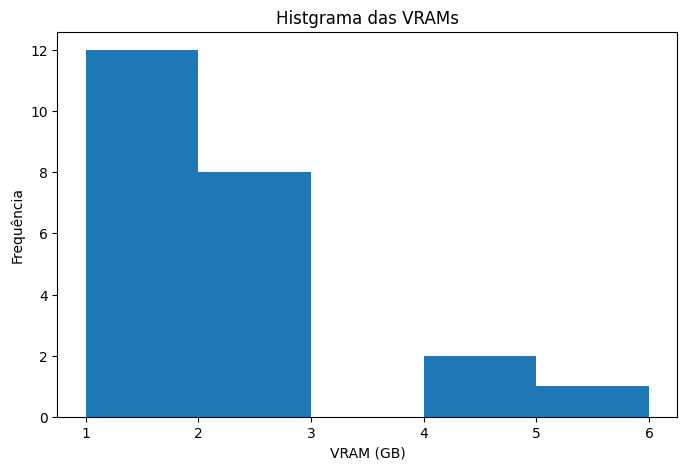

Média: 1.83
Mediana: 1.00
Desvio padrão: 1.27


In [19]:
plt.figure(figsize=(8, 5))
plt.hist(df_games_fixos["gpu_vram"], bins=5)

plt.title("Histgrama das VRAMs")
plt.xlabel("VRAM (GB)")
plt.ylabel("Frequência")
plt.show()

print(f"Média: {df_games_fixos["gpu_vram"].mean():.2f}")
print(f"Mediana: {df_games_fixos["gpu_vram"].median():.2f}")
print(f"Desvio padrão: {df_games_fixos["gpu_vram"].std():.2f}")

#### Análise do Histograma das VRAMs:
O histograma indica que a maioria dos jogos entre os que sempre aparecem nos 6 anos são jogos com requisitos mínimos baixos, o que torna esses jogos de mais fácil acesso ao público geral.

---

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


dados_cluster = df_games_fixos[["price_USD", "gpu_vram", "score", "main_story", "mean_average"]].copy()
dados_cluster = dados_cluster.fillna(dados_cluster.median())

scaler = StandardScaler()
dados_cluster_scl = scaler.fit_transform(dados_cluster)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(dados_cluster_scl)

cluster_labels = kmeans.labels_

df_games_fixos['cluster'] = cluster_labels

perfil_clusters = df_games_fixos.groupby('cluster')[["price_USD", "gpu_vram", "score", "main_story", "mean_average"]].mean().reset_index()
perfil_clusters

,cluster,price_USD,gpu_vram,score,main_story,mean_average
0,0,45.825000,1.500000,7.666667,36.710000,83575.333333
1,1,0.000000,3.000000,5.500000,220.550000,219934.343750
2,2,11.356364,1.727273,8.454545,39.961818,56158.621212
3,3,0.000000,1.000000,8.000000,446.520000,933970.020833


<Figure size 1200x1200 with 0 Axes>

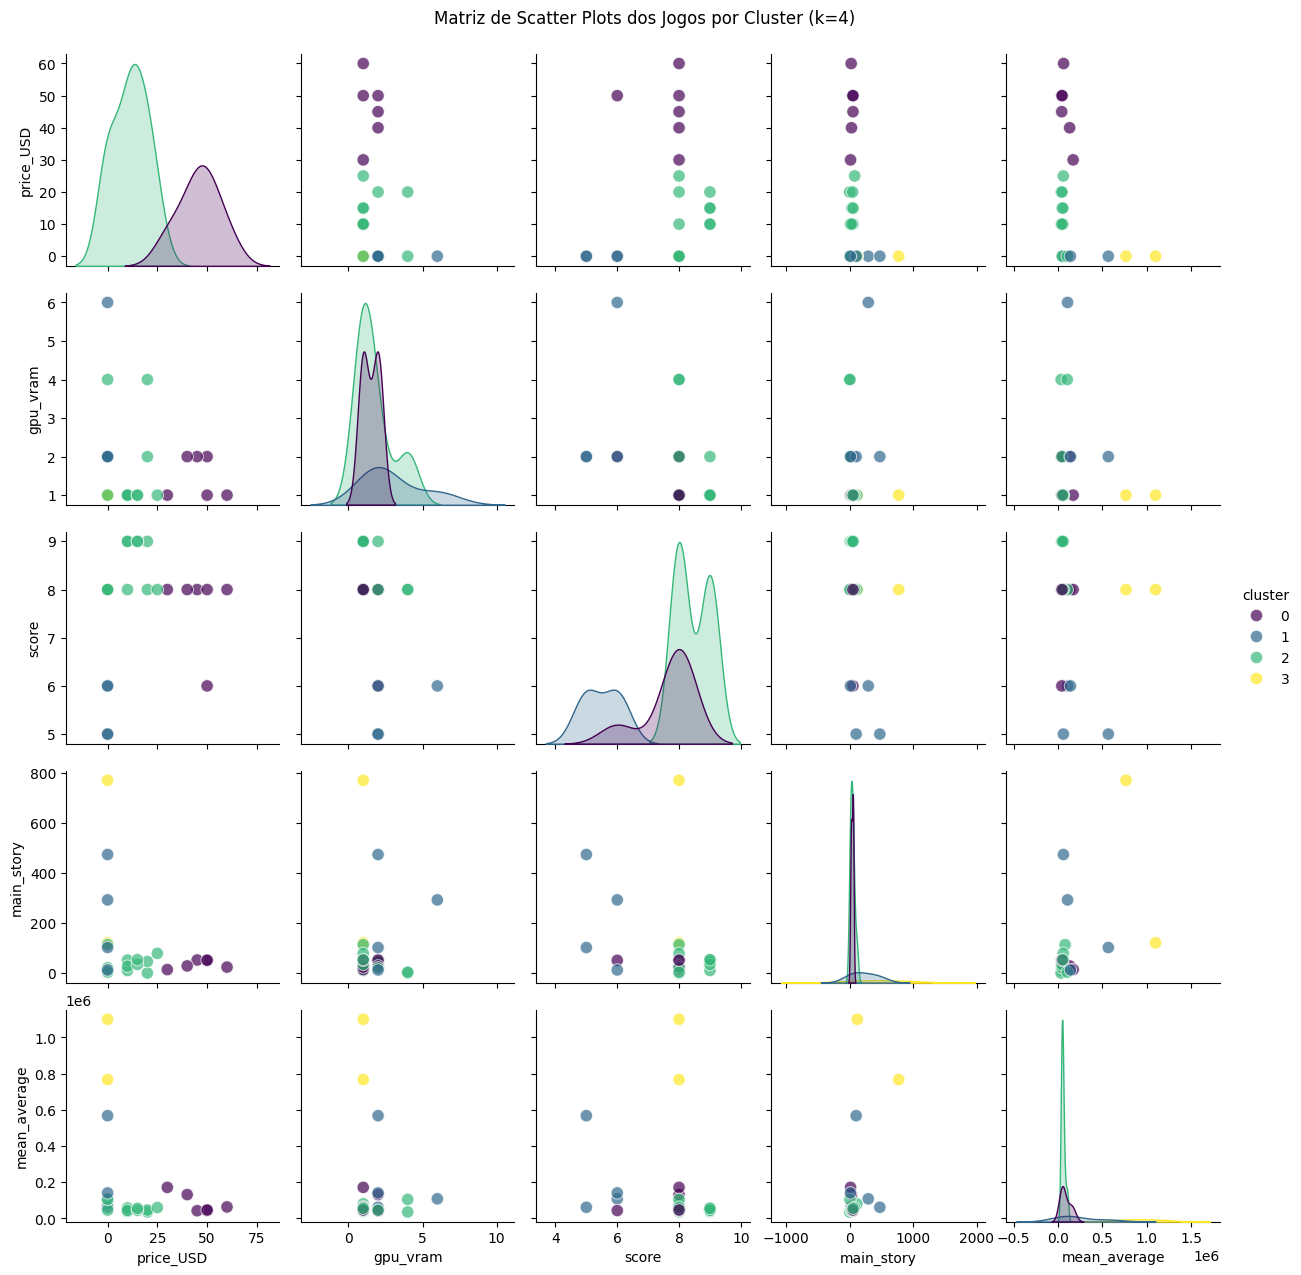

In [21]:
import seaborn as sns

cols_para_pairplot = ["price_USD", "gpu_vram", "score", "main_story", "mean_average"] + ['cluster']

plt.figure(figsize=(12, 12))

sns.pairplot(
    data=df_games_fixos,
    vars=["price_USD", "gpu_vram", "score", "main_story", "mean_average"], 
    hue='cluster',  
    palette='viridis',             
    diag_kind='kde',      
    plot_kws={'alpha': 0.7, 's': 80} 
)

plt.suptitle('Matriz de Scatter Plots dos Jogos por Cluster (k=4)', y=1.02) 
plt.show()

In [22]:
grupo_0 = df_games_fixos["game"].where(df_games_fixos["cluster"] == 0).dropna()
grupo_1 = df_games_fixos["game"].where(df_games_fixos["cluster"] == 1).dropna()
grupo_2 = df_games_fixos["game"].where(df_games_fixos["cluster"] == 2).dropna()
grupo_3 = df_games_fixos["game"].where(df_games_fixos["cluster"] == 3).dropna()


In [23]:
print("GRUPO 0:")
print(grupo_0)

print("--------------------------------------------|")
print("GRUPO 1:")
print(grupo_1)

GRUPO 0:
7                             DayZ
11                   7 Days to Die
12                            Rust
13       Grand Theft Auto V Legacy
14    Sid Meier’s Civilization® VI
19               Hearts of Iron IV
Name: game, dtype: object
--------------------------------------------|
GRUPO 1:
0         Team Fortress 2
10            War Thunder
21    PUBG: BATTLEGROUNDS
22              Destiny 2
Name: game, dtype: object


In [24]:
print("--------------------------------------------|")
print("GRUPO 2:")
print(grupo_2)

print("--------------------------------------------|")
print("GRUPO 3:")
print(grupo_3)

--------------------------------------------|
GRUPO 2:
1                         Left 4 Dead 2
4              FINAL FANTASY XIV Online
5                              Terraria
6                              PAYDAY 2
8                Euro Truck Simulator 2
9                              Warframe
15                             Unturned
16                Don't Starve Together
17    Tom Clancy's Rainbow Six® Siege X
18                     Dead by Daylight
20                       Stardew Valley
Name: game, dtype: object
--------------------------------------------|
GRUPO 3:
2              Dota 2
3    Counter-Strike 2
Name: game, dtype: object


#### Análise do Agrupamento
- Grupo 0: representa jogos com a média dos preços dos jogos mais alta, porém, com a menor média do número de horas jogadas;
- Grupo 1: representa jogos Free To Play que possuem a média das notas baixo, entretando com os maiores requisitos mínimos;
- Grupo 2: representa jogos com preços acessíveis, porém, possuem a média das notas mais altas e o menor número de jogadores;
- Grupo 3: representa jogos Free To Play que possuem o maior número de jogadores e maior tempo de jogo.

---

### 1. O valor dos jogos influenciam em sua popularidade ?

Juntando os picos que estava coletado ano por ano pra uma média dos anos para cada jogo

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob 

arquivos = glob.glob("data/most_played_*.csv")

dfs=[]

dfs = [pd.read_csv(arquivo) for arquivo in arquivos]

picos = pd.concat(dfs, ignore_index=True)

picos_unicos = picos.groupby("id", as_index=False)["peak"].mean()
df_games_info = pd.read_csv("data/all_games_info.csv")

df_final=pd.merge(df_games_info, picos_unicos, on="id", how="left")

df_final.to_csv("data/games_com_pico.csv", index=False)

#Ordena agora os jogos pelo media do pico de jogadores durante o ano
df_final_ordenado = df_final.sort_values(by="peak", ascending=False)
df_final_ordenado = df_final_ordenado.reset_index(drop=True)

df_final=df_final_ordenado
print("Todos os jogos com o preço e o pico")
print(df_final_ordenado[["id", "price_USD","peak"]])





Todos os jogos com o preço e o pico
          id  price_USD          peak
0    2358720      59.99  2.406967e+06
1    1623730      29.99  2.101535e+06
2        730       0.00  1.323927e+06
3        570       0.00  9.047697e+05
4     578080       0.00  7.650387e+05
..       ...        ...           ...
270   606880      34.99  1.619000e+04
271   848450      29.99  1.563700e+04
272   304390      29.99  1.552900e+04
273   492720      39.99  1.517000e+04
274   201270      29.99  1.170000e+02

[275 rows x 3 columns]


Montando gráfico de dispersão e calculando medidas estatísticas


--- Estatísticas Descritivas Chave ---
|       | Preço (USD)   | Pico de Jogadores   |
|:------|:--------------|:--------------------|
| count | 278           | 278                 |
| mean  | 29.3486       | 119688              |
| std   | 22.0708       | 229633              |
| min   | 0             | 2                   |
| 25%   | 9.99          | 41303.8             |
| 50%   | 29.99         | 64681.6             |
| 75%   | 44.99         | 105524              |
| max   | 99.99         | 2.40697e+06         |
Coeficiente de Correlação (ρ): -0.0226
Variância da Popularidade (peak): 52,731,490,674


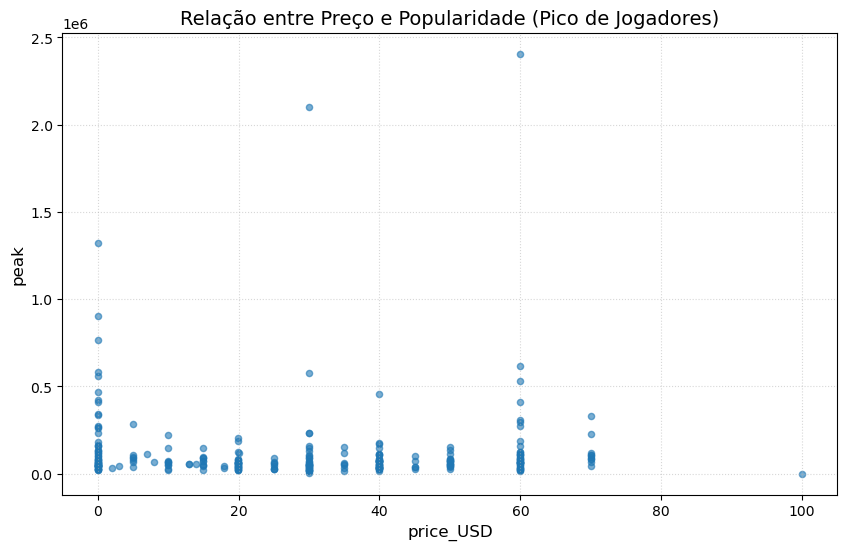

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df=pd.read_csv("data/games_com_pico.csv")

COLUNA_PRECO = 'price_USD'
COLUNA_POPULARIDADE = 'peak'



stats_preco = df[COLUNA_PRECO].describe().rename('Preço (USD)')
stats_pop = df[COLUNA_POPULARIDADE].describe().rename('Pico de Jogadores')


tabela_descritiva = pd.concat([stats_preco, stats_pop], axis=1)

print("\n--- Estatísticas Descritivas Chave ---")
print(tabela_descritiva.to_markdown(numalign="left", stralign="left"))


# 3. Coeficiente de Correlação e Variância
correlacao = df[COLUNA_PRECO].corr(df[COLUNA_POPULARIDADE])
variancia_pop = df[COLUNA_POPULARIDADE].var()
variancia_preco = df[COLUNA_PRECO].var()



print(f"Coeficiente de Correlação (ρ): {correlacao:.4f}")
print(f"Variância da Popularidade (peak): {variancia_pop:,.0f}")


plt.figure(figsize=(10, 6))
plt.scatter(
    df["price_USD"],
    df["peak"],
    alpha=0.6, 
    s=20       
)


plt.title('Relação entre Preço e Popularidade (Pico de Jogadores)', fontsize=14)
plt.xlabel(f'{"price_USD"}', fontsize=12)
plt.ylabel("peak", fontsize=12)
plt.grid(True, linestyle=':', alpha=0.5)


plt.show()

### Análise do gráfico de dispersao:
1. A grande maioria dos jogos com altos picos de jogadores são gratuitos, porém, quando se olha para os valores mais altos do gráfico, eles se referem a jogos pagos isso nos mostra que o fator preço zero é muito forte, porém a sua popularidade depende também de outros fatores, como os jogos AAA, blockbusters,que são jogos de "Prrimeira Pratelheira", ou jogos com um hype e qualidade que transcendem o preço. Esses jogos atingem o topo da popularidade apesar do preço, impulsionados por campanhas de marketing maciças e comunidades dedicadas que acaba implicando em uma correlação fraca, 


--- Popularidade Média e Mediana por Faixa de Preço ---
| Faixa_Preço                    | Media_Popularidade   | Mediana_Popularidade   | Contagem_Jogos   |
|:-------------------------------|:---------------------|:-----------------------|:-----------------|
| Grátis/Muito Barato ($0-$4.99) | 171190               | 84175.5                | 65               |
| Médio ($20-$59.99)             | 120661               | 65184.1                | 140              |
| Caro (>$60)                    | 96286.2              | 80396                  | 16               |
| Baixo ($5-$19.99)              | 66361.4              | 57764.2                | 54               |


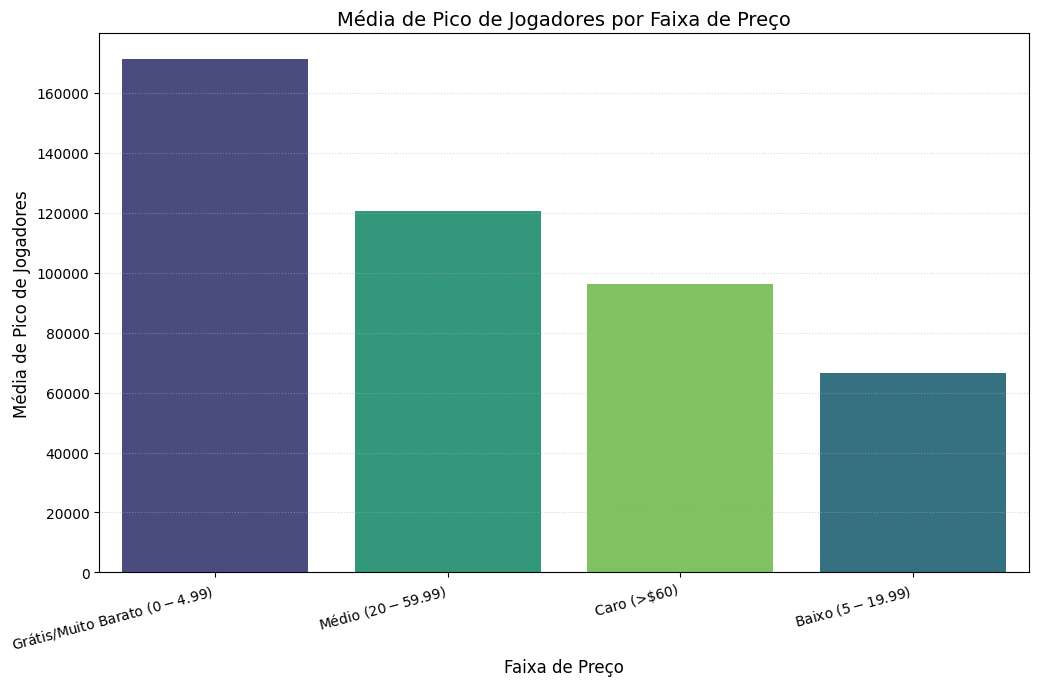

In [26]:
COLUNA_PRECO = 'price_USD'
COLUNA_POPULARIDADE = 'peak'


max_price = df_final[COLUNA_PRECO].max()

# Definindo Bins (Exemplo em USD: 0, 5, 20, 60, >60)
bins_preço = [0, 5, 20, 60, max_price + 1]
labels_preço = ['Grátis/Muito Barato ($0-$4.99)', 'Baixo ($5-$19.99)', 'Médio ($20-$59.99)', 'Caro (>$60)']

df_final['Faixa_Preço'] = pd.cut(
    df_final[COLUNA_PRECO],
    bins=bins_preço,
    labels=labels_preço,
    right=False
)

analise_agrupada = df_final.groupby('Faixa_Preço', observed=False)[COLUNA_POPULARIDADE].agg(
    Media_Popularidade = 'mean',
    Mediana_Popularidade = 'median',
    Contagem_Jogos = 'count'
).reset_index()


print("\n--- Popularidade Média e Mediana por Faixa de Preço ---")
print(analise_agrupada.sort_values(by='Media_Popularidade', ascending=False).to_markdown(index=False, numalign="left", stralign="left"))


plt.figure(figsize=(12, 7))

sns.barplot(
    x='Faixa_Preço',
    y='Media_Popularidade',
    data=analise_agrupada,
    palette='viridis',
    hue='Faixa_Preço', 
    legend=False,  
    order=analise_agrupada.sort_values('Media_Popularidade', ascending=False)['Faixa_Preço']
)

plt.title('Média de Pico de Jogadores por Faixa de Preço', fontsize=14)
plt.xlabel('Faixa de Preço', fontsize=12)
plt.ylabel('Média de Pico de Jogadores', fontsize=12)
plt.xticks(rotation=15, ha='right') # Rotaciona rótulos para melhor leitura
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.show()

### Análise final 
Sim, o preço dos jogos influencia significativamente na sua popularidade,mas de uma forma não-linear e com dinâmicas distintas entre as faixas de preço.

1. A correlação linear é muito fraca (ρ≈−0.08), indicando que o preço, por si só, não prevê a popularidade de forma constante e direta.

2. Analisando por faixa de preço:
     É evidente que a faixa de preço "Grátis/Muito Barato" tem a maior media de todas as faixas, embora tenha menos jogos que a faixa "Médio", confirmando que a de fato os jogos mais jogados se encontra na região onde os preços sao 0 ou muito barato. Quando olhamos pra faixa "Caro", confirmamos a presença dos blockbusters que apesar de sua média e media estarem altas, so teve apenas 7 jogos.

---

### 3. Quais gêneros de jogos têm dominado em termos de popularidade ao longo dos anos ?

Desempacotando os gêneros e filtrando para o escopo (2019-2024) para análises individuais

In [ ]:
import pandas as pd
import numpy as np


import pandas as pd
import numpy as np

df_final=pd.read_csv("data/games_com_pico.csv")


COLUNA_DATA_LANCAMENTO = 'release_date'
COLUNA_GENERO = 'genres'
COLUNA_POPULARIDADE = 'peak'
COLUNA_ANO = 'Ano_Lançamento' 



# Converte a coluna de data para o tipo datetime e extrai o ano
df_final[COLUNA_ANO] = pd.to_datetime(df_final[COLUNA_DATA_LANCAMENTO], errors='coerce').dt.year

df_final = df_final[(df_final[COLUNA_ANO] >= 2019) & (df_final[COLUNA_ANO] <= 2024)].copy()


# 3b. Divisão da string de Gêneros: Converte a string (ex: "Action, Indie") em uma lista
df_final[COLUNA_GENERO] = df_final[COLUNA_GENERO].str.split(', ')

# 3c. EXPLODE: Cria uma nova linha para cada gênero de cada jogo.
df_exploded = df_final.explode(COLUNA_GENERO)


print("DataFrame 'df_analise_genero' criado e pronto para análise por gênero e ano.")
print(f"Número de linhas antes da explosão: {len(df_final)}")
print(f"Número de linhas após a explosão: {len(df_exploded)}")


print("\nDataFrame Explodido (gênero, popularidade, ano de lançamento):")
print(df_exploded[[COLUNA_GENERO, COLUNA_POPULARIDADE, COLUNA_ANO]].head().to_markdown(index=False, numalign="left", stralign="left"))

DataFrame 'df_analise_genero' criado e pronto para análise por gênero e ano.
Número de linhas antes da explosão: 195
Número de linhas após a explosão: 548

DataFrame Explodido (gênero, popularidade, ano de lançamento):
| genres     | peak    | Ano_Lançamento   |
|:-----------|:--------|:-----------------|
| Action     | 60204   | 2019             |
| Indie      | 60204   | 2019             |
| Casual     | 58374.3 | 2020             |
| Indie      | 58374.3 | 2020             |
| Simulation | 58374.3 | 2020             |


Agrupando por gênero, criando o gráfico em barra dos gêneros mais jogados de uma forma mais geral printando medidadas estatísticas


--- Top 10 Gêneros por Popularidade Média no Período Total ---
| genres                | Media_Popularidade   | Mediana_Popularidade   | Desvio_Padrao_Popularidade   | Soma_Popularidade   | Contagem_Jogos   |
|:----------------------|:---------------------|:-----------------------|:-----------------------------|:--------------------|:-----------------|
| Early Access          | 257105               | 92341.5                | 509297                       | 4.11368e+06         | 16               |
| RPG                   | 186767               | 72930                  | 376842                       | 1.3634e+07          | 73               |
| Adventure             | 171453               | 77154                  | 347619                       | 1.45735e+07         | 85               |
| Massively Multiplayer | 159213               | 80224.2                | 179753                       | 3.82112e+06         | 24               |
| Free To Play          | 151036               | 76273      

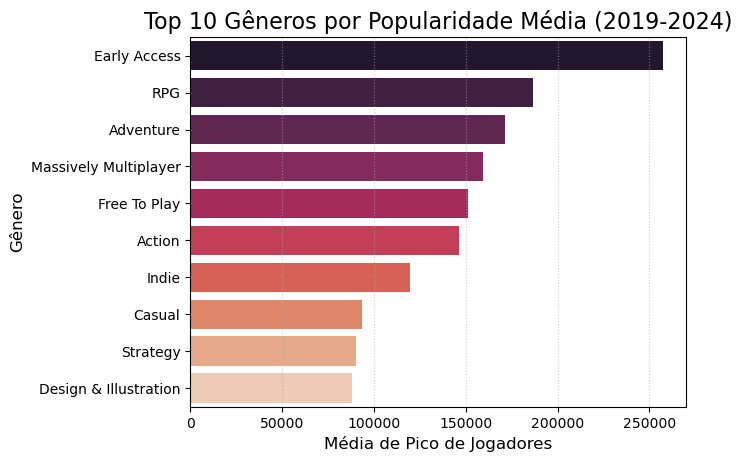

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por gênero e calcular a popularidade média, total e contagem de jogos
dominio_geral_genero = df_exploded.groupby(COLUNA_GENERO).agg(
    Media_Popularidade = (COLUNA_POPULARIDADE, 'mean'),
    Mediana_Popularidade = (COLUNA_POPULARIDADE, 'median'), 
    Desvio_Padrao_Popularidade = (COLUNA_POPULARIDADE, 'std'),
    Soma_Popularidade = (COLUNA_POPULARIDADE, 'sum'),
    Contagem_Jogos = (COLUNA_GENERO, 'count')
).reset_index()

# ordenando para ver os mais populares
dominio_geral_genero_ordenado = dominio_geral_genero.sort_values(by='Media_Popularidade', ascending=False)

print("\n--- Top 10 Gêneros por Popularidade Média no Período Total ---")
print(dominio_geral_genero_ordenado.head(10).to_markdown(index=False, numalign="left", stralign="left"))


sns.barplot(
    x='Media_Popularidade',
    y=COLUNA_GENERO,
    data=dominio_geral_genero_ordenado.head(10),
    hue=COLUNA_GENERO,
    palette='rocket',
    legend=False
)

plt.title('Top 10 Gêneros por Popularidade Média (2019-2024)', fontsize=16)
plt.xlabel('Média de Pico de Jogadores', fontsize=12)
plt.ylabel('Gênero', fontsize=12)
plt.grid(axis='x', linestyle=':', alpha=0.6)
plt.show()


### Analise sobre o grafico em barra
Em geral, o período de 2019-2024 foi dominado por jogos que, ou estão em desenvolvimento ativo (Early Access), ou oferecem experiências ricas e imersivas (RPG, Adventure, MMO, Action). O modelo "Free To Play" também é um motor claro de popularidade.

---

Agrupamento triplo por ano de lançamento, média dos picos de jogadores e o gênero, gráfico de linha pra ver a evolução durante os anos

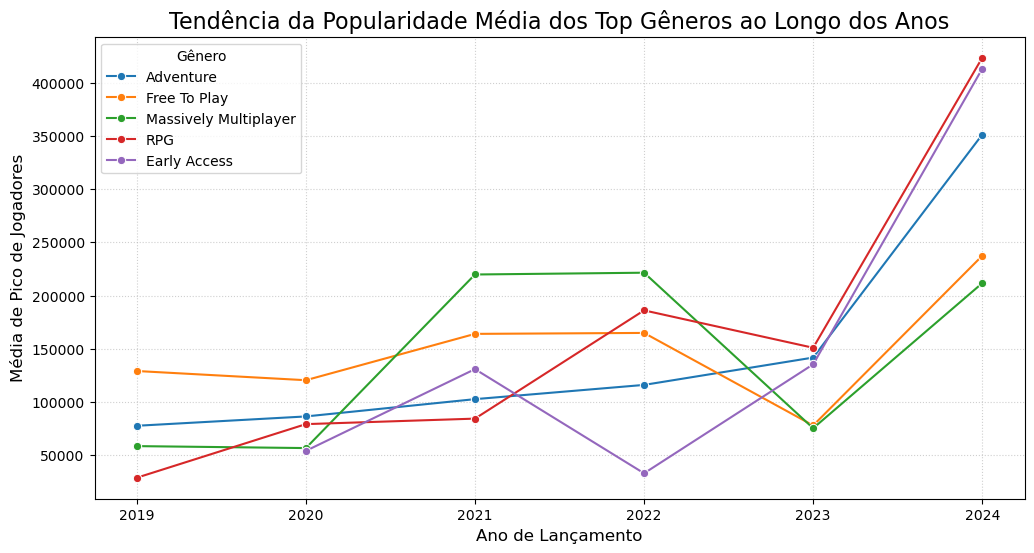

In [ ]:
# Agrupamento triplo: Ano_Lançamento, Gênero, Popularidade Média
tendencia_generos_anual = df_exploded.groupby([COLUNA_ANO, COLUNA_GENERO]).agg(
    Media_Popularidade = (COLUNA_POPULARIDADE, 'mean')
).reset_index()

# Identificar os Top N gêneros mais populares em média no período total para focar na tendência
top_n_generos = dominio_geral_genero_ordenado.head(5)[COLUNA_GENERO].tolist()

# Filtrar a tendência anual apenas para esses top N gêneros
tendencia_top_generos = tendencia_generos_anual[
    tendencia_generos_anual[COLUNA_GENERO].isin(top_n_generos)
]



# Visualização: Gráfico de Linhas da Tendência dos Top 5 Gêneros
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=COLUNA_ANO,
    y='Media_Popularidade',
    hue=COLUNA_GENERO,
    data=tendencia_top_generos,
    marker='o'
)

plt.title('Tendência da Popularidade Média dos Top Gêneros ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Média de Pico de Jogadores', fontsize=12)
plt.xticks(tendencia_top_generos[COLUNA_ANO].unique().astype(int)) # Garante rótulos de ano inteiros
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(title='Gênero')
plt.show()

### Ánalise sobre grafico de linha
O mercado de jogos teve um boom de popularidade média em quase todos os gêneros principais entre 2023 e 2024, possivelmente impulsionado por novos lançamentos de sucesso, maior adoção de jogos ou eventos de grandes jogos. "Adventure", "Free To Play", "Early Access" e "RPG" são os gêneros que mais se beneficiaram ou mantiveram sua dominância de popularidade média nesse período recente.

A análise dos dados de 2019 a 2024 revela que a dominância de gêneros em termos de popularidade é multifacetada.

Em termos de popularidade média geral, os jogos em 'Early Access' lideram, seguidos de perto por gêneros tradicionais robustos como 'RPG', 'Adventure', 'Massively Multiplayer' e 'Action', além do modelo de negócio 'Free To Play'. Isso indica que tanto a experimentação e participação no desenvolvimento (Early Access) quanto experiências imersivas e acessíveis (Free To Play) são motores fortes de engajamento.

Analisando a tendência ao longo dos anos, observamos um crescimento notável na popularidade média de quase todos os top gêneros entre 2023 e 2024. Gêneros como 'Adventure', 'Free To Play', 'Early Access' e 'RPG' demonstraram uma ascensão particularmente expressiva nesse período mais recente, atingindo os maiores picos de popularidade média do período analisado. Embora 'Massively Multiplayer' tenha mostrado um comportamento mais flutuante, a tendência geral aponta para um aumento generalizado na média de pico de jogadores nos gêneros dominantes nos últimos anos.

---